## Пример работы энтропии-сложности для различных условий

 [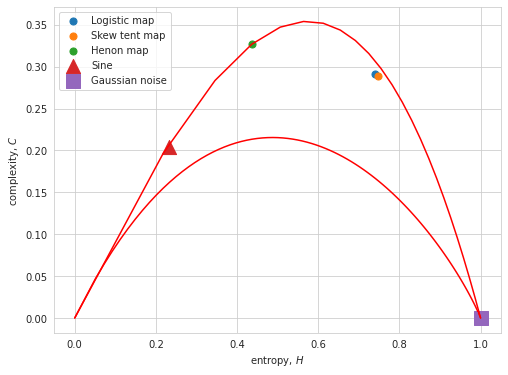](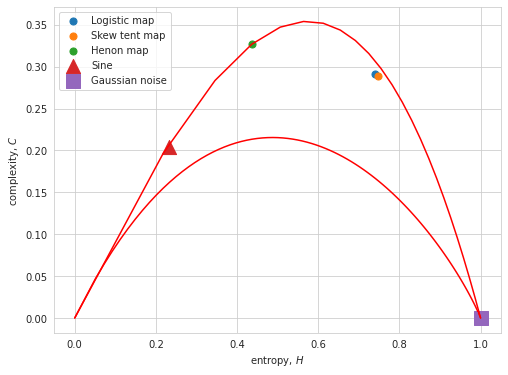)


## Ограничения метода 

Из-за статистических соображений, приминение метода имеет смысл только в одном случае: <br /> 
L >> N! (L - длина ряда, N - параметр метода)

## Чего от нас хочет Громов?


### 1) Найти примерную зависимость между длиной ряда и N! (Что значит "во много раз больше" в ограничениях метода)

<br />
Этот эксперимент является немного абстрактным, так как он будет иметь смысл в большей степени только для искусственных рядов (т.к. их можно генерить сколь угодно большими)


### 2) Найти нормирующую траекторию для любого ряда

### 3) Какая-то адская шиза - надо будет разобраться на следующей встрече

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from entropy_complexity import entropy_complexity, get_borders
from tqdm import tqdm
from math import factorial

In [2]:
def nomralizing_function(trajectory, trajectory_norm):
    return trajectory / trajectory_norm

In [3]:
trajectory_1 = np.array([[1, 1], [2, 2], [3, 3]])
trajectory_2 = np.array([[10, 10], [6, 4], [5, 9]])

print(trajectory_2 / trajectory_1)

[[10.         10.        ]
 [ 3.          2.        ]
 [ 1.66666667  3.        ]]


In [4]:
for N in tqdm(range(2, 10)):
    M = 1
    min_ec, max_ec = get_borders(n=N, m=M)

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 251.07it/s]


In [51]:
def functions_testing(inp, checker)->float:
    if checker == 0:
        return 0
    elif checker == 1:
        print("yes")
        n = 10**(len(str(inp)))
        print(n)
        return n
    elif checker == 2:
        n = int(factorial(inp) * np.exp((inp**((1.055+inp/100)))))
        return n
   
def plotting_test(inp=0, checker=0):
    s1 = ''
    for i in range(2,inp):
        length = functions_testing(i, checker)
        noise = np.random.normal(size=length)
        M = 1
        min_ec, max_ec = get_borders(n=i, m=M)
        EC = entropy_complexity(noise, n=i, m=M)
        print(EC)      
        f, ax = plt.subplots(1,1,figsize=(16, 7))

        ax.plot(max_ec[:,0], max_ec[:,1],color='r')
        ax.plot(min_ec[:,0], min_ec[:,1],color='r')
        counter = 0
        ax.scatter(*EC, label="Noise for function %s" %checker, s=200, marker='.')
           
    # ax.scatter(*EC[-2], label=ts_names[-2], s=200, marker='^')
    # ax.scatter(*EC[-1], label=ts_names[-1], s=200, marker='s')


        ax.set_xlabel('entropy, $H$')
        ax.set_ylabel('complexity, $C$')
        plt.title("Normalized Entropy-Complexity plane, N=%s" % (i), fontsize = 17)
        ax.legend()
        plt.show()

(0.9967916319816367, 0.002569931427348054)


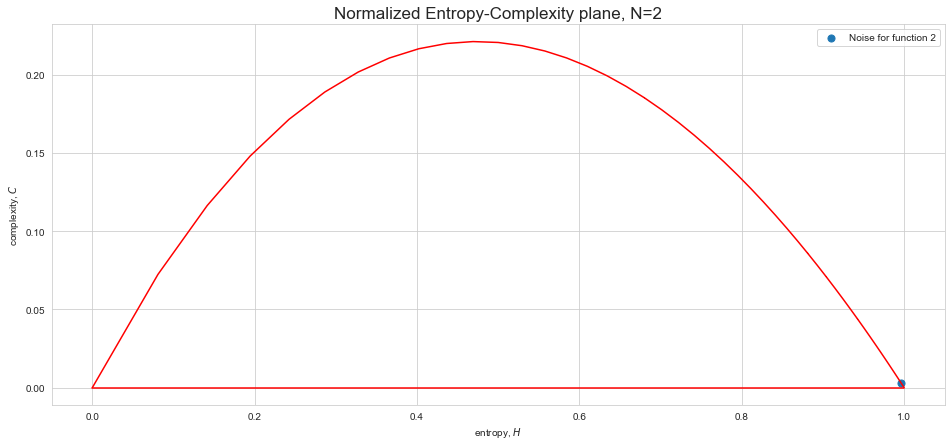

(0.9974604937626923, 0.002528759602197339)


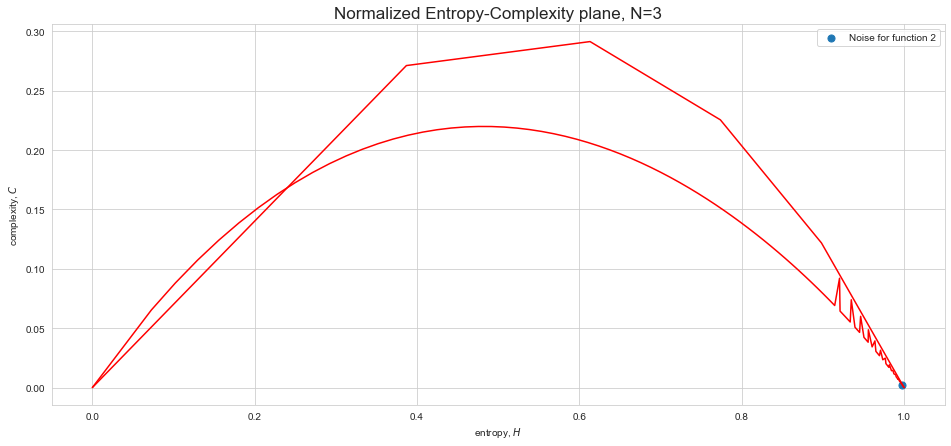

(0.9989419891089673, 0.0014012356725142307)


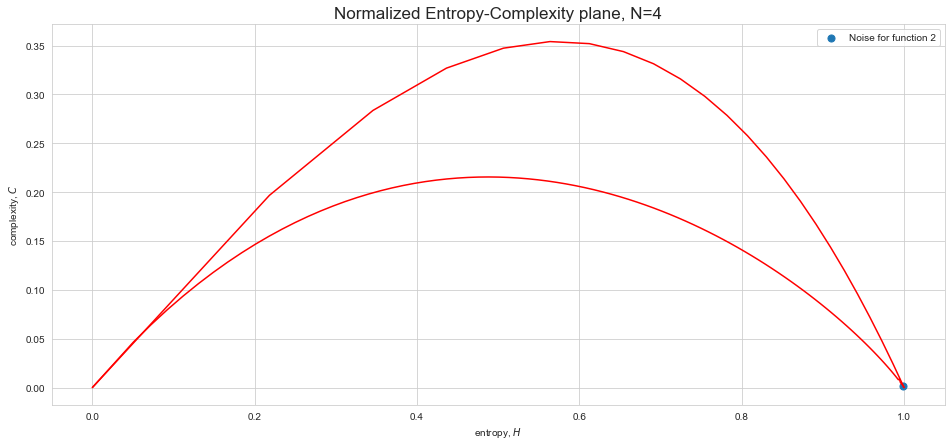

(0.9997837572630551, 0.0003861050603010264)


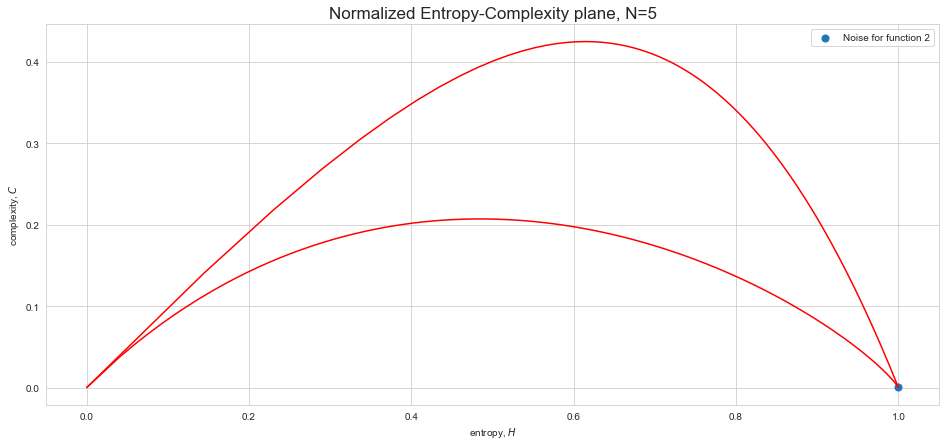

(0.9999558919895235, 0.00010554600734174305)


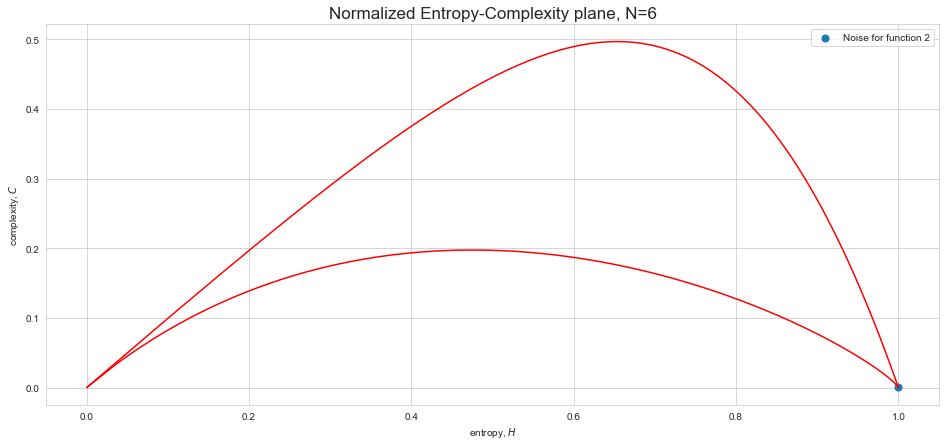

(0.9999920418563887, 2.4504774354203387e-05)


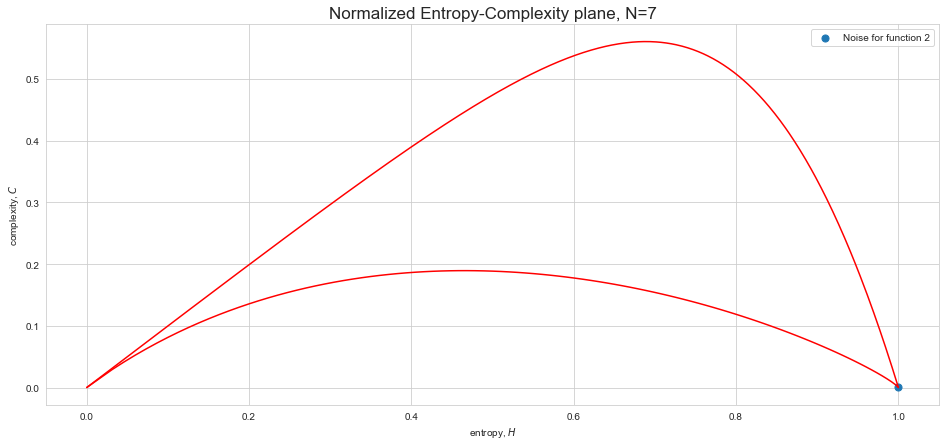

In [52]:
plotting_test(8, 2)